<a href="https://colab.research.google.com/github/TALeonard/19ma573thomasleonard/blob/master/src/hw7_correlations_to_aac_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we import modules:

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Note that we are not importing contract_v01 or sde_1d_v01 since we are computing *all* option prices via exact sampling. Next, we supply parameters as defined in the assignment:

In [0]:
#paras are given here
S0 = 100.0
K = 110.0
r = 0.0475
sigma = 0.20
T = 1.
num_step = 4
num_paths = 100

With parameters in place, produce the code to match up to pseudocode. First, we make the code to produce a BM path, and the code to run a Geometric Mean (for the exact sampling of the Geometric Option) since there is no numpy equivalent for this (i.e. there is nothing like np.geomean or something).

def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

In [0]:
def BM_gen(T1, T2, n): #para: start time, end time, mesh numbr
  t = np.linspace(T1, T2, num = n+1)
  W = np.zeros(n+1)
  #Run (3.2)
  for i in range(n):
    W[i+1] = W[i] + 1./np.sqrt(n) * np.random.normal()
    
  return t, W



Now, make the bsm_option_payoff_generators code.

In [0]:
def bsm_option_payoff_generators(num_step,num_paths,s0,strike,r,sigma,maturity):
  
  n = num_step;
  m = num_paths;
  
  #Step 1: Make matrices to store hisory and other results.
  stock_history = np.zeros((m,n+1))
  stock_history[:,0] = s0;
  
  #Arrays for Arithmetic
  A = np.zeros(m)
  AAC = np.zeros(m)
  
  #Array for European
  EC = np.zeros(m)
  
  #Arrays for Geometric
  G_container = np.zeros(m)
  GAC = np.zeros(m)
  
  #Array for stock payoff
  STK = np.zeros(m)
  
  # Generate (num_paths) many GBM paths by exact sampling.
  
  for i in range(m):
    [t,W] = BM_gen(0,maturity,n)
    for j in range(n):
      stock_history[i,j+1] = s0 * np.exp((r-(0.5*(sigma**2)))*t[j+1] + sigma*W[j+1])
      #The above code is the same as 6-3, since it's the same process
    
    #Compute discounted(?) payoff of the Arithmetic option.
    A[i] = np.mean(stock_history[i,:])
    if A[i] - strike > 0:
      AAC[i] = (A[i]-strike)
    else:
      AAC[i] = 0
    
    #Compute discounted(?) payoff of European option.
    if stock_history[i, n-1] - strike > 0:
      EC[i] = (stock_history[i, n-1] - strike)
    else:
      EC[i] = 0
      
    #Compute discounted(?) payoff of Geometric option.
    G_container[i] = (stock_history[i,:].prod())**(1.0/len(stock_history[i,:]))
    if G_container[i] - strike > 0:
      GAC[i] = (G_container[i] - strike)
    else:
      GAC[i] = 0
    
    #Compute payoff of the stock itself.
    STK[i] = stock_history[i,n-1] - s0
  
  #plot figures.
  plt.figure()
  plt.plot(AAC,STK,'ro')
  plt.xlabel("AAC Payoff")
  plt.ylabel("Stock Payoff")
  plt.title("AAC vs. Stock")

  plt.figure()
  plt.plot(AAC,EC,'ro')
  plt.xlabel("AAC Payoff")
  plt.ylabel("EC Payoff")
  plt.title("AAC vs. EC")
  
  plt.figure()
  plt.plot(AAC,GAC,'ro')
  plt.xlabel("AAC Payoff")
  plt.ylabel("GAC Payoff")
  plt.title("AAC vs. GAC")  
    

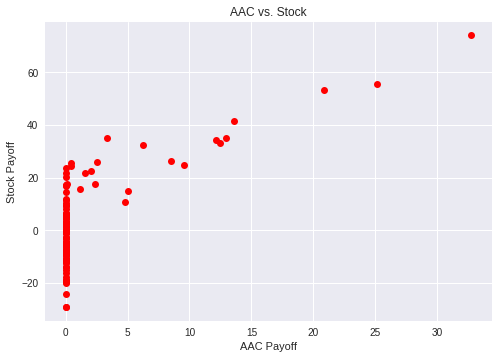

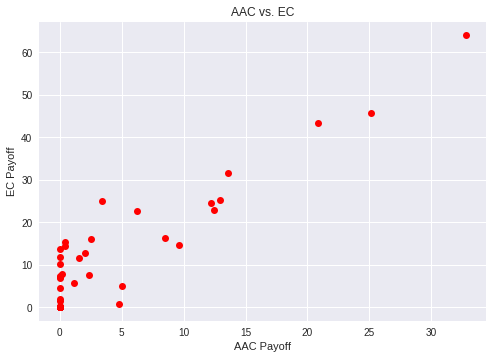

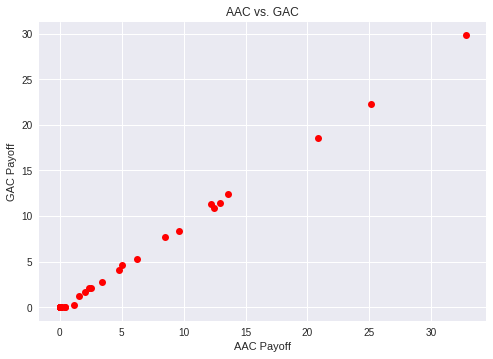

In [5]:
bsm_option_payoff_generators(num_step,num_paths,S0,K,r,sigma,T)

A correlation analysis is not even needed to tell that the GAC is most highly correlated to the AAC. This makes sense to think about, as both are roughly the same calculation (both involve taking a mean across the observation period, so both should result in numbers that are somewhere near eachother, dependant on the underlying variance of the model). Both are not as susceptible to the value of the stock at time T being a strong outlier.

I am not sure what the question about improving the OMC computation is asking, and will come back to that later.